In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

КАНАЛИЗАЦИЯ

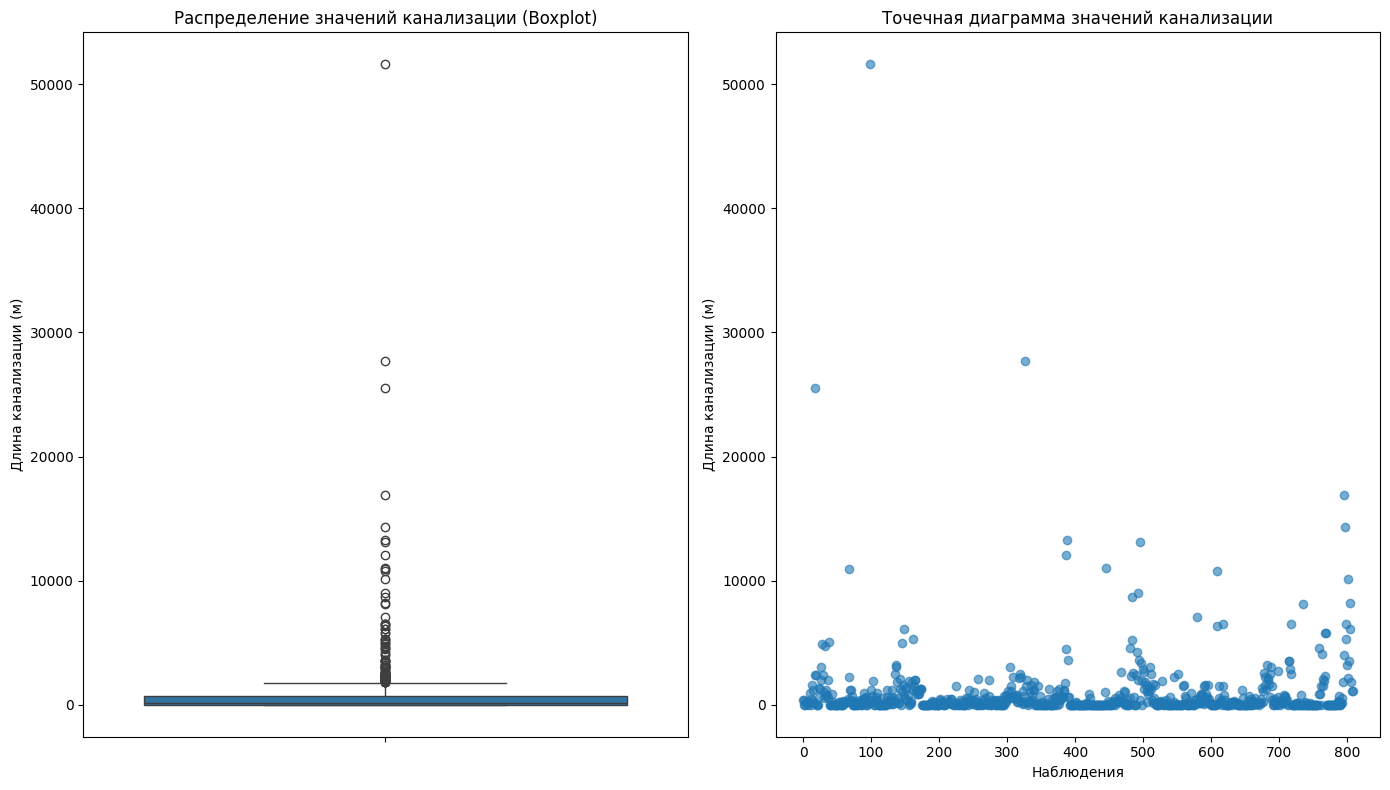

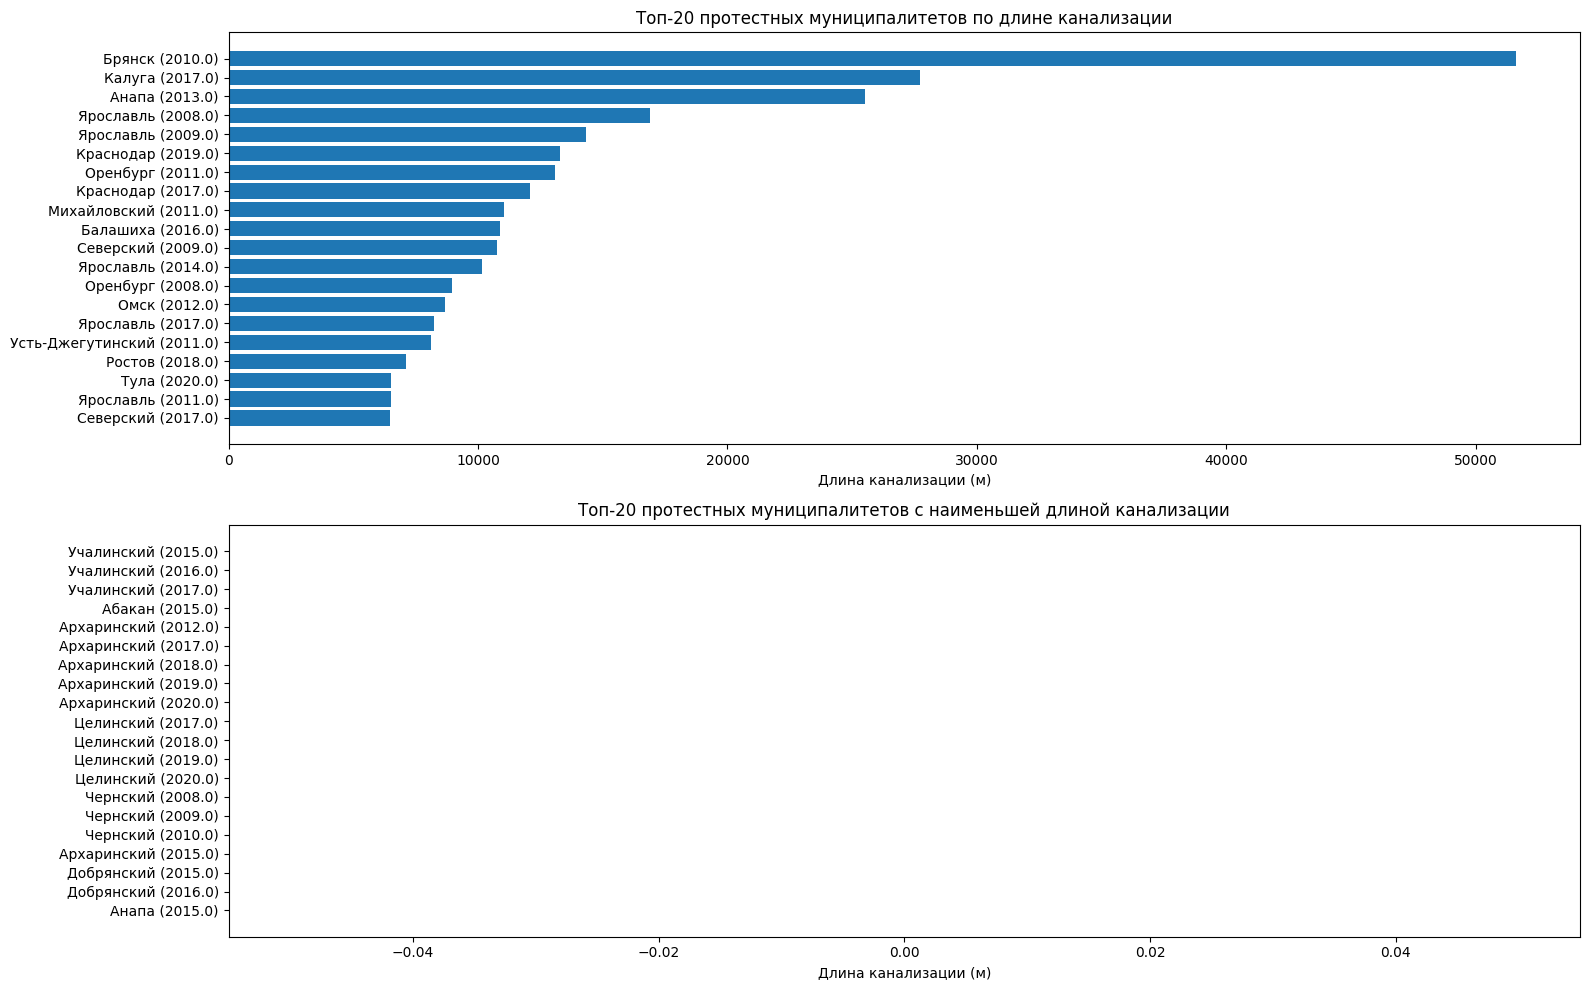

Статистика распределения:
Минимальное значение: 0.0 м
Максимальное значение: 51600.0 м
Среднее значение: 896.28 м
Медиана: 132.0 м
Q1 (25-й перцентиль): 0.0 м
Q3 (75-й перцентиль): 700.0 м
Границы выбросов: [-1050.00, 1750.00] м

Количество выбросов: 101
Количество выбросов больше 10000: 12

Экстремальные значения (выбросы):
Анапа (2012.0): 2400.0 м
Анапа (2013.0): 25500.0 м
Анапа (2014.0): 2400.0 м
Архангельск (2008.0): 3065.0 м
Архангельск (2009.0): 2000.0 м
Архангельск (2010.0): 4900.0 м
Архангельск (2011.0): 2400.0 м
Архангельск (2014.0): 4750.0 м
Архангельск (2018.0): 2000.0 м
Архангельск (2020.0): 5027.0 м
Балашиха (2016.0): 10900.0 м
Балашиха (2017.0): 2200.0 м
Брянск (2010.0): 51600.0 м
Брянск (2014.0): 1900.0 м
Вологда (2020.0): 2457.0 м
Воронеж (2008.0): 3000.0 м
Воронеж (2009.0): 3200.0 м
Воронеж (2010.0): 1800.0 м
Воронеж (2015.0): 2100.0 м
Воронеж (2017.0): 4980.0 м
Воронеж (2020.0): 6090.0 м
Гатчинский (2014.0): 1890.0 м
Гатчинский (2019.0): 1860.0 м
Гатчинский (2020.0): 

In [2]:
df = pd.read_csv('2010t.csv')

protest_data = df[['municipality_protest', 'Канализация (1 м)_protest', 'year']].copy()
protest_data.columns = ['municipality', 'canalization', 'year']
protest_data = protest_data.dropna()

# Создаем график
plt.figure(figsize=(14, 8))

# Boxplot для выявления выбросов
plt.subplot(1, 2, 1)
sns.boxplot(y=protest_data['canalization'])
plt.title('Распределение значений канализации (Boxplot)')
plt.ylabel('Длина канализации (м)')

# Scatter plot для визуализации всех значений
plt.subplot(1, 2, 2)
plt.scatter(range(len(protest_data)), protest_data['canalization'], alpha=0.6)
plt.title('Точечная диаграмма значений канализации')
plt.xlabel('Наблюдения')
plt.ylabel('Длина канализации (м)')

plt.tight_layout()
plt.show()

# Дополнительный детализированный график
plt.figure(figsize=(16, 10))

# Сортируем данные для лучшей визуализации
sorted_data = protest_data.sort_values('canalization', ascending=False)

# Барплот топ-20 муниципалитетов с наибольшими значениями
top_20 = sorted_data.head(20)
plt.subplot(2, 1, 1)
plt.barh(top_20['municipality'] + ' (' + top_20['year'].astype(str) + ')', 
         top_20['canalization'])
plt.title('Топ-20 протестных муниципалитетов по длине канализации')
plt.xlabel('Длина канализации (м)')
plt.gca().invert_yaxis()  # Чтобы наибольшее значение было сверху

# Барплот топ-20 муниципалитетов с наименьшими значениями
bottom_20 = sorted_data.tail(20)
plt.subplot(2, 1, 2)
plt.barh(bottom_20['municipality'] + ' (' + bottom_20['year'].astype(str) + ')', 
         bottom_20['canalization'])
plt.title('Топ-20 протестных муниципалитетов с наименьшей длиной канализации')
plt.xlabel('Длина канализации (м)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Статистический анализ для выявления выбросов
Q1 = protest_data['canalization'].quantile(0.25)
Q3 = protest_data['canalization'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = protest_data[
    (protest_data['canalization'] < lower_bound) | 
    (protest_data['canalization'] > upper_bound)
]

# Подсчет муниципалитетов с длиной канализации более 10000 метров
over_10000 = protest_data[protest_data['canalization'] > 10000]
over_10000_count = len(over_10000)

print("Статистика распределения:")
print(f"Минимальное значение: {protest_data['canalization'].min()} м")
print(f"Максимальное значение: {protest_data['canalization'].max()} м")
print(f"Среднее значение: {protest_data['canalization'].mean():.2f} м")
print(f"Медиана: {protest_data['canalization'].median()} м")
print(f"Q1 (25-й перцентиль): {Q1} м")
print(f"Q3 (75-й перцентиль): {Q3} м")
print(f"Границы выбросов: [{lower_bound:.2f}, {upper_bound:.2f}] м")
print(f"\nКоличество выбросов: {len(outliers)}")
print(f"Количество выбросов больше 10000: {over_10000_count}")

if not outliers.empty:
    print("\nЭкстремальные значения (выбросы):")
    for _, row in outliers.iterrows():
        print(f"{row['municipality']} ({row['year']}): {row['canalization']} м")

# Дополнительная информация о муниципалитетах с длиной канализации > 10000 м
if over_10000_count > 0:
    print(f"\nМУНИЦИПАЛИТЕТЫ С ДЛИНОЙ КАНАЛИЗАЦИИ > 10000 м ({over_10000_count}):")
    print("-" * 70)
    for _, row in over_10000.sort_values('canalization', ascending=False).iterrows():
        print(f"{row['municipality']} ({row['year']}): {row['canalization']} м")
    
    # Дополнительная статистика по этим значениям
    print(f"\nДополнительная статистика для значений > 10000 м:")
    print(f"Среднее значение: {over_10000['canalization'].mean():.2f} м")
    print(f"Максимальное значение: {over_10000['canalization'].max()} м")
    print(f"Минимальное значение: {over_10000['canalization'].min()} м")
    print(f"Медиана: {over_10000['canalization'].median()} м")
    
    # Годовое распределение
    year_distribution = over_10000['year'].value_counts().sort_index()
    print(f"\nРаспределение по годам:")
    for year, count in year_distribution.items():
        print(f"  {year}: {count} муниципалитетов")
        
    # Процент от общего количества
    total_count = len(protest_data)
    percentage = (over_10000_count / total_count) * 100
    print(f"\nПроцент от общего количества данных: {percentage:.2f}%")
else:
    print("\nМуниципалитетов с длиной канализации более 10000 м не обнаружено.")



In [3]:
def replace_outliers(df, outcome, threshold=10000):

    # Обработка значений для protest и event
    for suffix in ['_protest', '_event']:
        col_name = f'{outcome}{suffix}'
        
        # Заменяем значения >= threshold на среднее по году (без выбросов)
        for year in df['year'].unique():
            year_mask = df['year'] == year
            
            # Получаем значения для текущего года без выбросов (< threshold)
            year_values = df.loc[year_mask & (df[col_name] < threshold), col_name]
            
            if len(year_values) > 0:
                year_mean = year_values.mean()
                
                # Заменяем выбросы на среднее по году
                outlier_mask = year_mask & (df[col_name] >= threshold)
                df.loc[outlier_mask, col_name] = year_mean
    
    return df

CSV_PATHS = ['2010t.csv', '2010tM.csv', '2010tM2.csv', '2010t+.csv', 
             '2012t.csv', '2012tM.csv', '2012tM2.csv', '2012t+.csv',
             '2010t5.csv', '2010t5M.csv', '2010t5M2.csv', '2010t5+.csv',
             '2010t6.csv', '2010t6M.csv', '2010t6M2.csv', '2010t6+.csv'
             ]






OUTCOME = 'Канализация (1 м)'

for CSV_PATH in CSV_PATHS:
    df = pd.read_csv(CSV_PATH)
    df['year'] = df['year'].astype(float).round().astype(int)
    
    # Замена выбросов
    df_processed = replace_outliers(df, OUTCOME, threshold=10000)
    
    # Сохранение обработанного файла
    output_filename = CSV_PATH.replace('.csv', '_1.csv')
    df_processed.to_csv(output_filename, index=False)


ВОДОПРОВОД

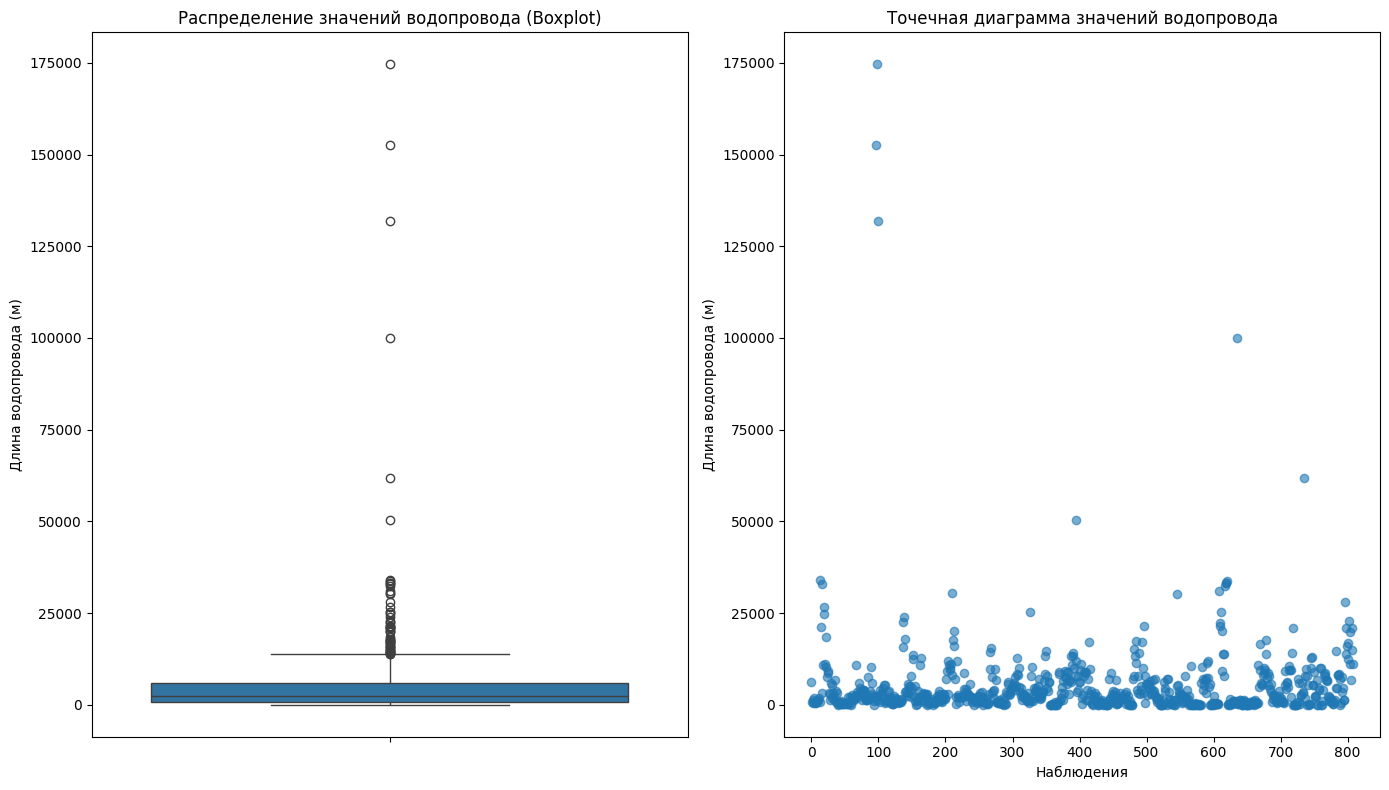

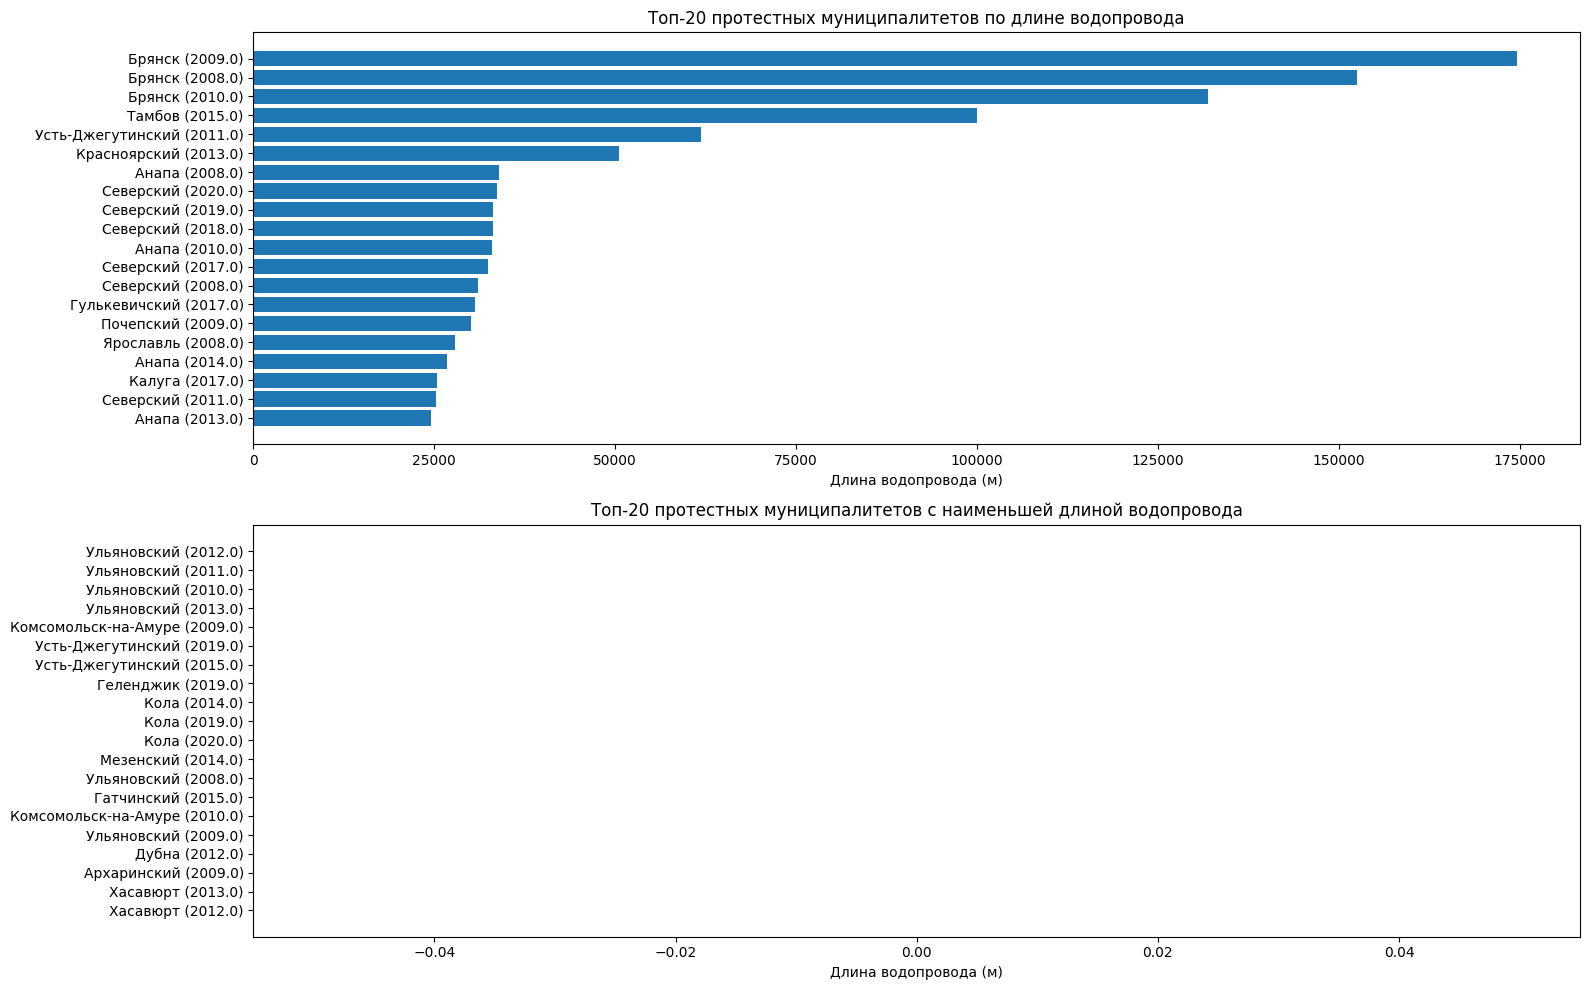

Статистика распределения:
Минимальное значение: 0.0 м
Максимальное значение: 174600.0 м
Среднее значение: 5094.09 м
Медиана: 2300.0 м
Q1 (25-й перцентиль): 700.0 м
Q3 (75-й перцентиль): 5990.0 м
Границы выбросов: [-7235.00, 13925.00] м

Количество выбросов: 56
Количество выбросов больше 30000: 15

Экстремальные значения (выбросы):
Анапа (2008.0): 34000.0 м
Анапа (2009.0): 21300.0 м
Анапа (2010.0): 32900.0 м
Анапа (2013.0): 24600.0 м
Анапа (2014.0): 26700.0 м
Анапа (2017.0): 18500.0 м
Брянск (2008.0): 152545.0 м
Брянск (2009.0): 174600.0 м
Брянск (2010.0): 131986.0 м
Воронеж (2008.0): 15800.0 м
Воронеж (2009.0): 22600.0 м
Воронеж (2010.0): 24000.0 м
Воронеж (2012.0): 17800.0 м
Гулькевичский (2017.0): 30550.0 м
Гулькевичский (2018.0): 17510.0 м
Гулькевичский (2019.0): 16002.0 м
Гулькевичский (2020.0): 20120.0 м
Завьяловский (2010.0): 14452.0 м
Завьяловский (2011.0): 15380.0 м
Калуга (2017.0): 25400.0 м
Кинельский (2015.0): 14700.0 м
Красноярский (2008.0): 14140.0 м
Красноярский (2013.0):

In [ ]:
df = pd.read_csv('2010t.csv')
protest_data = df[['municipality_protest', 'Водопровод (1 метр)_protest', 'year']].copy()
protest_data.columns = ['municipality', 'vodoprovod', 'year']
protest_data = protest_data.dropna()

# Создаем график
plt.figure(figsize=(14, 8))

# Boxplot для выявления выбросов
plt.subplot(1, 2, 1)
sns.boxplot(y=protest_data['vodoprovod'])
plt.title('Распределение значений водопровода (Boxplot)')
plt.ylabel('Длина водопровода (м)')

# Scatter plot для визуализации всех значений
plt.subplot(1, 2, 2)
plt.scatter(range(len(protest_data)), protest_data['vodoprovod'], alpha=0.6)
plt.title('Точечная диаграмма значений водопровода')
plt.xlabel('Наблюдения')
plt.ylabel('Длина водопровода (м)')

plt.tight_layout()
plt.show()

# Дополнительный детализированный график
plt.figure(figsize=(16, 10))

# Сортируем данные для лучшей визуализации
sorted_data = protest_data.sort_values('vodoprovod', ascending=False)

# Барплот топ-20 муниципалитетов с наибольшими значениями
top_20 = sorted_data.head(20)
plt.subplot(2, 1, 1)
plt.barh(top_20['municipality'] + ' (' + top_20['year'].astype(str) + ')', 
         top_20['vodoprovod'])
plt.title('Топ-20 протестных муниципалитетов по длине водопровода')
plt.xlabel('Длина водопровода (м)')
plt.gca().invert_yaxis()  # Чтобы наибольшее значение было сверху

# Барплот топ-20 муниципалитетов с наименьшими значениями
bottom_20 = sorted_data.tail(20)
plt.subplot(2, 1, 2)
plt.barh(bottom_20['municipality'] + ' (' + bottom_20['year'].astype(str) + ')', 
         bottom_20['vodoprovod'])
plt.title('Топ-20 протестных муниципалитетов с наименьшей длиной водопровода')
plt.xlabel('Длина водопровода (м)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Статистический анализ для выявления выбросов
Q1 = protest_data['vodoprovod'].quantile(0.25)
Q3 = protest_data['vodoprovod'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = protest_data[
    (protest_data['vodoprovod'] < lower_bound) | 
    (protest_data['vodoprovod'] > upper_bound)
]

# Подсчет муниципалитетов с длиной водопровода более 30000 метров
over_30000 = protest_data[protest_data['vodoprovod'] > 30000]
over_30000_count = len(over_30000)

print("Статистика распределения:")
print(f"Минимальное значение: {protest_data['vodoprovod'].min()} м")
print(f"Максимальное значение: {protest_data['vodoprovod'].max()} м")
print(f"Среднее значение: {protest_data['vodoprovod'].mean():.2f} м")
print(f"Медиана: {protest_data['vodoprovod'].median()} м")
print(f"Q1 (25-й перцентиль): {Q1} м")
print(f"Q3 (75-й перцентиль): {Q3} м")
print(f"Границы выбросов: [{lower_bound:.2f}, {upper_bound:.2f}] м")
print(f"\nКоличество выбросов: {len(outliers)}")
print(f"Количество выбросов больше 30000: {over_30000_count}")

if not outliers.empty:
    print("\nЭкстремальные значения (выбросы):")
    for _, row in outliers.iterrows():
        print(f"{row['municipality']} ({row['year']}): {row['vodoprovod']} м")

# Дополнительная информация о муниципалитетах с длиной водопровода > 30000 м
if over_30000_count > 0:
    print(f"\nМУНИЦИПАЛИТЕТЫ С ДЛИНОЙ ВОДОПРОВОДА > 30000 м ({over_30000_count}):")
    print("-" * 60)
    for _, row in over_30000.sort_values('vodoprovod', ascending=False).iterrows():
        print(f"{row['municipality']} ({row['year']}): {row['vodoprovod']} м")
    
    # Дополнительная статистика по этим значениям
    print(f"\nДополнительная статистика для значений > 30000 м:")
    print(f"Среднее значение: {over_30000['vodoprovod'].mean():.2f} м")
    print(f"Максимальное значение: {over_30000['vodoprovod'].max()} м")
    print(f"Минимальное значение: {over_30000['vodoprovod'].min()} м")
    
    # Годовое распределение
    year_distribution = over_30000['year'].value_counts().sort_index()
    print(f"\nРаспределение по годам:")
    for year, count in year_distribution.items():
        print(f"  {year}: {count} муниципалитетов")
else:
    print("\nМуниципалитетов с длиной водопровода более 30000 м не обнаружено.")

In [ ]:
def replace_outliers_water(df, outcome, threshold=30000):

    # Обработка значений для protest и event
    for suffix in ['_protest', '_event']:
        col_name = f'{outcome}{suffix}'
        
        # Заменяем значения >= threshold на среднее по году (без выбросов)
        for year in df['year'].unique():
            year_mask = df['year'] == year
            
            # Получаем значения для текущего года без выбросов (< threshold)
            year_values = df.loc[year_mask & (df[col_name] < threshold), col_name]
            
            if len(year_values) > 0:
                year_mean = year_values.mean()
                
                # Заменяем выбросы на среднее по году
                outlier_mask = year_mask & (df[col_name] >= threshold)
                df.loc[outlier_mask, col_name] = year_mean
    
    return df

# CSV_PATHS = [
#              '2010t_1.csv', '2010tM_1.csv', '2010tM2_1.csv', '2010t+_1.csv', 
#              '2012t_1.csv', '2012tM_1.csv', '2012tM2_1.csv', '2012t+_1.csv',
#              '2010t5_1.csv', '2010t5M_1.csv', '2010t5M2_1.csv', '2010t5+_1.csv',
#              '2010t6_1.csv', '2010t6M_1.csv', '2010t6M2_1.csv', '2010t6+_1.csv'
             
#              ]

CSV_PATHS = [
    '2010t4_1.csv', '2010t4М_1.csv', '2010t4М2_1.csv', '2010t4+_1.csv',
    '2010t3_1.csv', '2010t3М_1.csv', '2010t3М2_1.csv', '2010t3+_1.csv'
             ]
OUTCOME = 'Водопровод (1 метр)'

for CSV_PATH in CSV_PATHS:
    df = pd.read_csv(CSV_PATH)
    df['year'] = df['year'].astype(float).round().astype(int)
    
    # Замена выбросов
    df_processed = replace_outliers_water(df, OUTCOME, threshold=30000)
    
    # Сохранение обработанного файла
    output_filename = CSV_PATH.replace('_1.csv', '_2.csv')
    df_processed.to_csv(output_filename, index=False)


АНАЛИЗ ИСПРАВЛЕННЫХ ДАННЫХ

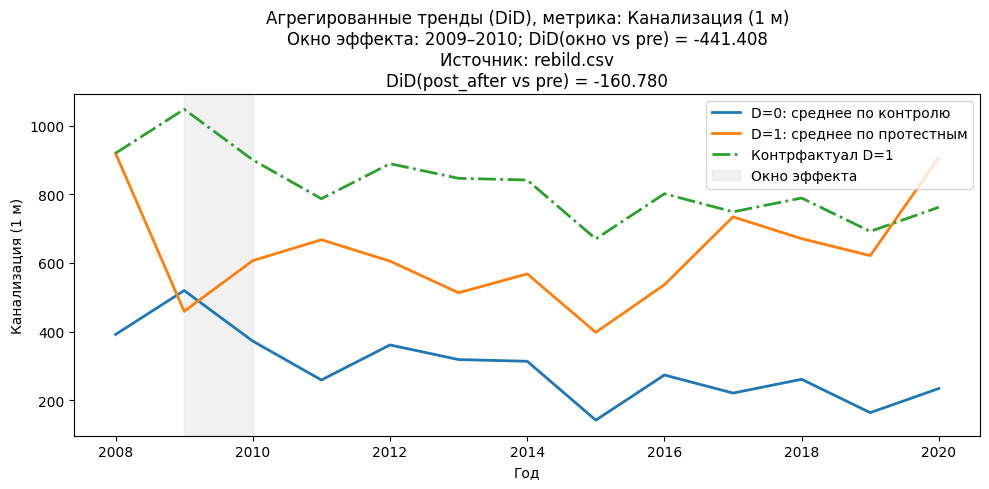

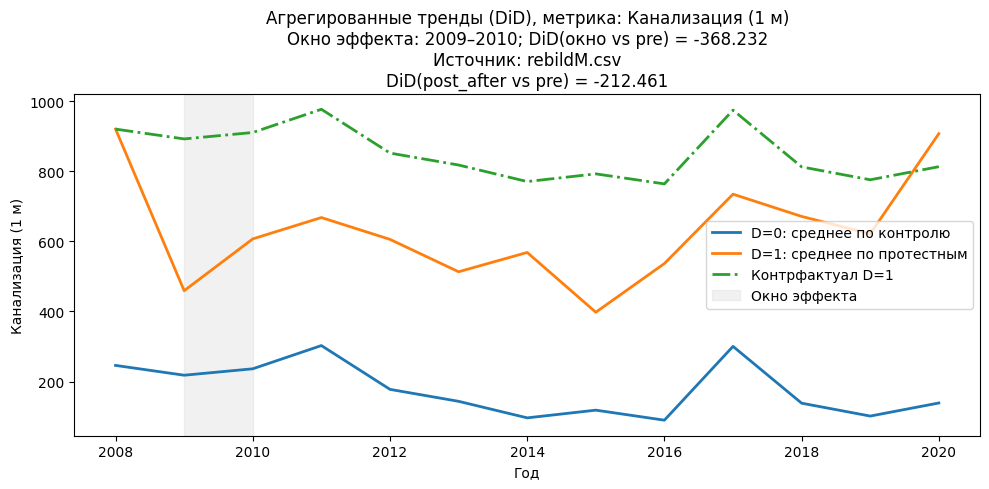

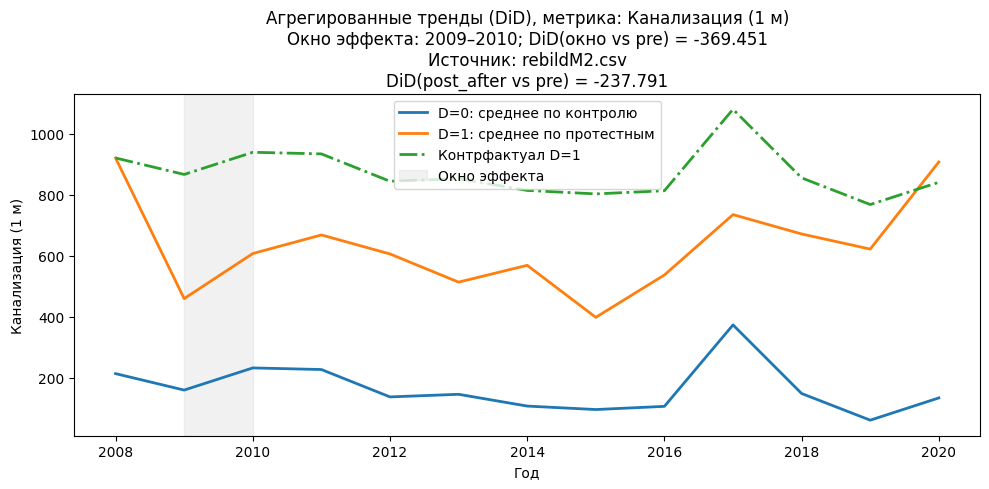

In [ ]:

CSV_PATHS = ['rebild.csv', 'rebildM.csv', 'rebildM2.csv']
# OUTCOME = 'Водопровод (1 метр)'  # Изменено на Канализацию
OUTCOME = 'Канализация (1 м)'
START_YEAR = 2009
END_YEAR = 2010
OUTPUT_DIR = Path('did_output')

for CSV_PATH in CSV_PATHS:
    df = pd.read_csv(CSV_PATH)
    df['year'] = df['year'].astype(float).round().astype(int)
    
    agg = (
        df.groupby('year', dropna=False)
          .agg(
              mean_treated=(f'{OUTCOME}_protest', 'mean'),
              mean_control=(f'{OUTCOME}_event', 'mean'),
          )
          .reset_index()
          .sort_values('year')
          .reset_index(drop=True)
    )

    pre_mask = agg['year'] < START_YEAR
    window_mask = (agg['year'] >= START_YEAR) & (agg['year'] <= END_YEAR)
    post_mask = agg['year'] > END_YEAR

    treated_pre = agg.loc[pre_mask, 'mean_treated'].mean()
    control_pre = agg.loc[pre_mask, 'mean_control'].mean()
    treated_win = agg.loc[window_mask, 'mean_treated'].mean()
    control_win = agg.loc[window_mask, 'mean_control'].mean()

    did_window = (treated_win - treated_pre) - (control_win - control_pre)

    if post_mask.any():
        treated_post = agg.loc[post_mask, 'mean_treated'].mean()
        control_post = agg.loc[post_mask, 'mean_control'].mean()
        did_post_after = (treated_post - treated_pre) - (control_post - control_pre)
    else:
        treated_post = control_post = did_post_after = None

    treated_cf = treated_pre + (agg['mean_control'] - control_pre)

    plt.figure(figsize=(10, 5))
    plt.plot(agg['year'], agg['mean_control'], label='D=0: среднее по контролю', lw=2)
    plt.plot(agg['year'], agg['mean_treated'], label='D=1: среднее по протестным', lw=2)
    plt.plot(agg['year'], treated_cf, label='Контрфактуал D=1', lw=2, ls='-.')

    plt.axvspan(START_YEAR, END_YEAR, color='lightgrey', alpha=0.3, label='Окно эффекта')

    title_lines = [
        f'Агрегированные тренды (DiD), метрика: {OUTCOME}',
        f'Окно эффекта: {START_YEAR}–{END_YEAR}; DiD(окно vs pre) = {did_window:.3f}',
        f'Источник: {CSV_PATH}'
    ]
    if did_post_after is not None:
        title_lines.append(f'DiD(post_after vs pre) = {did_post_after:.3f}')
    plt.title('\n'.join(title_lines))

    plt.xlabel('Год')
    plt.ylabel(OUTCOME)
    plt.legend()
    plt.tight_layout()
    plt.show()